In [2]:
!pip install numpy pandas matplotlib seaborn sklearn

     |████████████████████████████████| 24.9 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 2.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=91c4af717af164e9fe2f87eabf7788f5db990dfcf6714254389c23f32c0e3ef0
  Stored in directory: /home/jovyan/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import des données

In [5]:
# lecture du fichier .csv
df = pd.read_csv("OnlineNewsPopularity.csv")

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## Creating popularity label

Le nombre de partage est un bon indicateur de popularité pour les nouvelles. C'est pour cela qu'on choisi d'utiliser ce paramêtre pour labeliser les données

In [8]:
df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [9]:
share_data=df[' shares']


share_label = list()
for share in share_data:
    if share <= 645:
        share_label.append('Very Poor')
    elif share > 645 and share <= 861:
        share_label.append('Poor')
    elif share > 861 and share <= 1400:
        share_label.append('Average')
    elif share > 1400 and share <= 31300:
        share_label.append('Good')
    elif share > 31300 and share <= 53700:
        share_label.append('Very Good')
    elif share > 53700 and share <= 77200:
        share_label.append('Excellent')
    else:
        share_label.append('Exceptional')

# Ajout de cette liste dans le dataframe
df = pd.concat([df, pd.DataFrame(share_label, columns=['popularity'])], axis=1)

In [10]:
class_counts = df.groupby('popularity').size().reset_index()
class_counts.columns = ['Popularity','No of articles']
class_counts

,Popularity,No of articles
0,Average,12381
1,Excellent,80
2,Exceptional,95
3,Good,19156
4,Poor,4852
5,Very Good,231
6,Very Poor,2849


## Formatage des données

On remarque que le dataset contient un grand nombre de données redondante sous forme de bouléen pour les jours de la semaine et les types de nouvelles.

On va donc regrouper ces données sous la formes de 2 colones dédiées.

De plus le colone "url" et "timedata" ne sont pas des données utiles.

Certaines lignes de données aberrantes sont aussi à supprimer.

In [11]:
print (df.shape)

#On cherche à regrouper les colones des jours de la semaine en une seule
publishdayMerge=df[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
#On cherche à regrouper les colones des canaux en une seule
DataChannelMerge=df[[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world' ]]
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

(39644, 62)


In [12]:
# Ajout de ces colones au dataframe
df.insert(loc=11, column='weekdays', value=temp_arr)
df.insert(loc=12, column='data_channel', value=DataChannel_arr)

#  Suppression des données
df.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world', 
                 ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday'], axis = 1, inplace=True)

In [13]:
# Supréssion des colones de données non utilisées (non prédictive)
df.drop(labels=['url', ' timedelta'], axis = 1, inplace=True)

count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name:  n_non_stop_words, dtype: float64


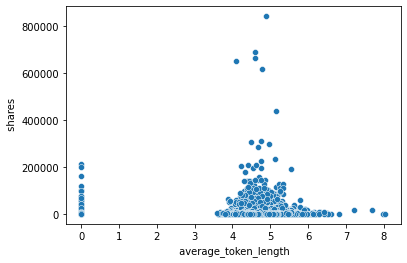

In [14]:
# Suppression des données aberrantes
sns.scatterplot(x=' average_token_length',y=' shares', data=df)
print(df[' n_non_stop_words'].describe())

In [15]:
# n_non_stop_words contient un écart
# n_tokens_content ne peut pas être nul

df = df[df[' n_non_stop_words'] != 1042]
df = df[df[' n_tokens_content'] != 0]
print (df.shape)

(38462, 49)


In [16]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,weekdays,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,Monday,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Very Poor
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,Monday,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Poor
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,Monday,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Good
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,Monday,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Average
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,Monday,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Very Poor


## Visualisation de données

### Distribution des données qualitatives

    weekdays  count
0     Friday   5538
1     Monday   6471
2   Saturday   2369
3     Sunday   2657
4   Thursday   7052
5     Tueday   7170
6  Wednesday   7205


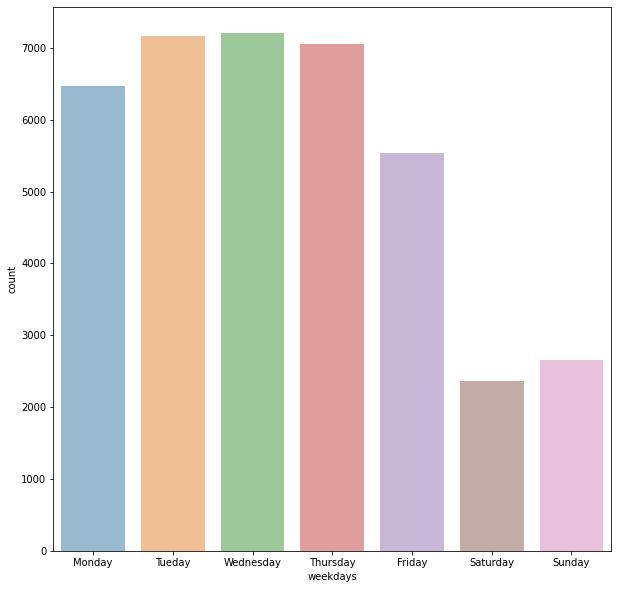

In [17]:
# Visualisation de la distribution des données les jours de la semaines
weekdays_data = df.groupby('weekdays').size().reset_index()
weekdays_data.columns = ['weekdays','count']
print(weekdays_data)
fig, axes = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='weekdays',data=df,alpha=0.5, ax=axes)

   Data Channels  No of articles
0       Business            6235
1  Entertainment            6855
2      Lifestyle            2077
3         Others            5491
4   Social Media            2311
5           Tech            7325
6          World            8168


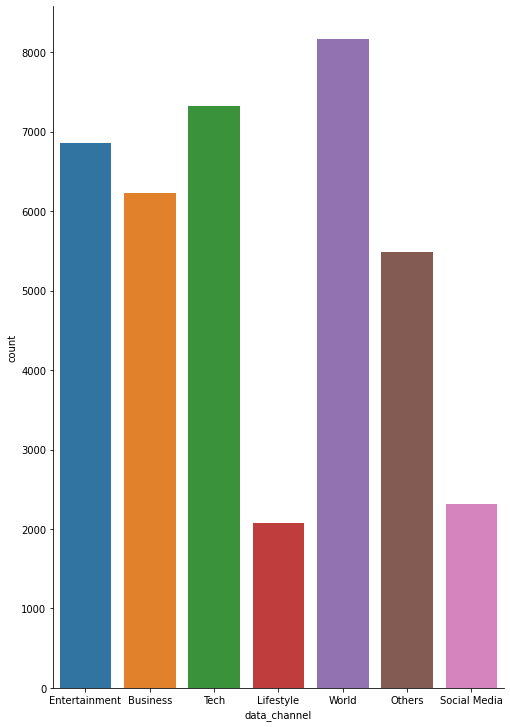

In [18]:
# Visualisation de la distribution des données selon les canaux de diffusion
data_channel_data = df.groupby('data_channel').size().reset_index()
data_channel_data.columns = ['Data Channels','No of articles']
print(data_channel_data)
sns.catplot(x='data_channel', data=df, kind="count", height=10, aspect=.7)

### Visualisation de la distribution avec la popularité

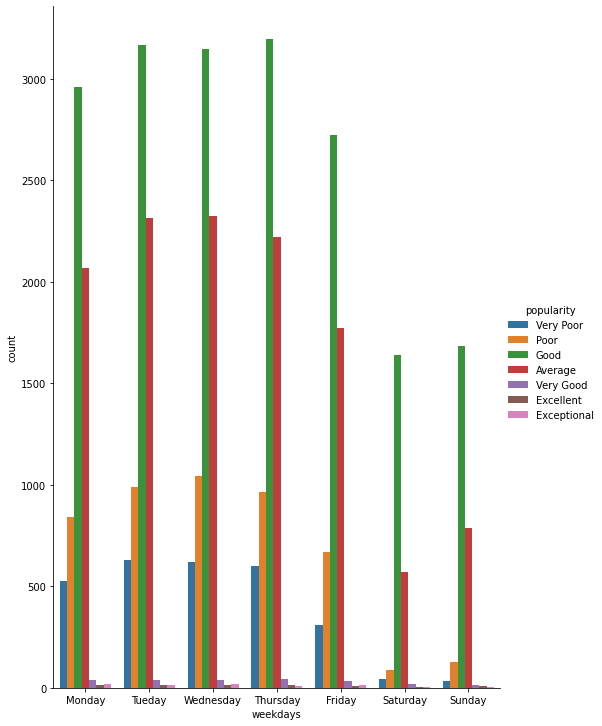

In [19]:
ax = sns.catplot(x='weekdays', hue="popularity", data=df, kind="count", height=10, aspect=.7)

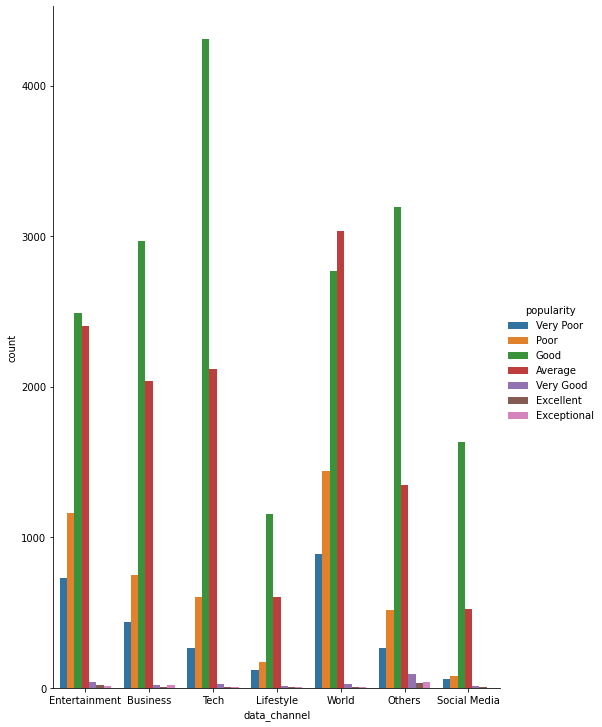

In [20]:
ax = sns.catplot(x='data_channel', hue="popularity", data=df, kind="count", height=10, aspect=.7)

### Données qualitatives

#### Words data

n_tokens_title: Number of words in the title

n_tokens_content: Number of words in the content

n_unique_tokens: Rate of unique words in the content

n_non_stop_words: Rate of non-stop words in the content

n_non_stop_unique_tokens: Rate of unique non-stop words in the content

average_token_length: Average length of the words in the content 

<AxesSubplot:xlabel=' n_tokens_content', ylabel='popularity'>

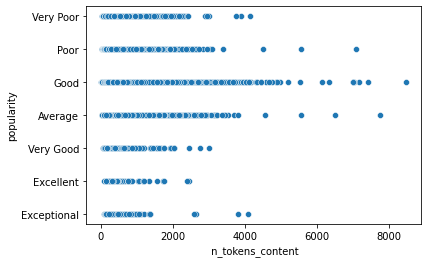

In [21]:
sns.scatterplot(x=' n_tokens_content',y='popularity', data=df)

##### Commentaire

La popularité des articles dépend du nombre de mots dans le contenu. Ceux qui sont populaires en contiennent mois de 2000

<AxesSubplot:xlabel=' n_tokens_title', ylabel=' shares'>

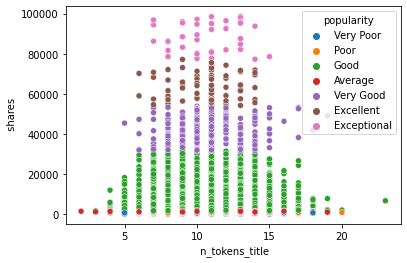

In [22]:
tmp = df[df[' shares'] <= 100000]
sns.scatterplot(x=' n_tokens_title',y=' shares', hue='popularity', data=tmp)

##### Commentaire

La popularité des articles dépend du nombre de mots dans le titre. Ceux qui sont populaires en contiennent entre 6 et 17

<AxesSubplot:xlabel=' n_unique_tokens', ylabel=' shares'>

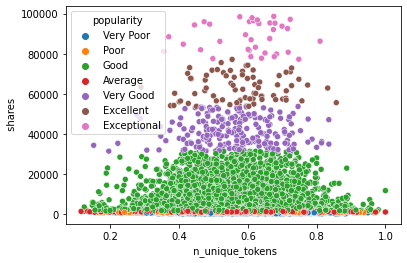

In [23]:
sns.scatterplot(x=' n_unique_tokens',y=' shares', hue='popularity', data=tmp)

##### Commentaire

La popularité des articles dépend de la fréquence d'utilisation des mots. Ceux qui sont populaires on un ration entre 0.3 et 0.8

<AxesSubplot:xlabel=' average_token_length', ylabel=' shares'>

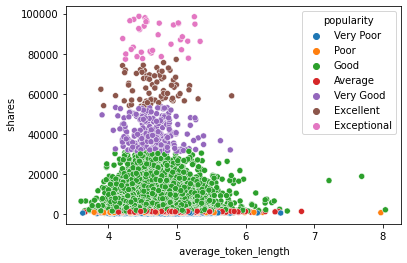

In [24]:
sns.scatterplot(x=' average_token_length',y=' shares', hue='popularity', data=tmp)

##### Commentaire

La popularité des articles dépend de la longueure moyenne des mots. Ceux qui sont populaires contiennent entre 4 et 6 caractères

<AxesSubplot:xlabel=' num_keywords', ylabel=' shares'>

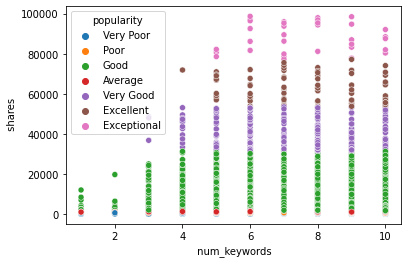

In [25]:
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=tmp)

##### Commentaire

La popularité des articles dépend de la quantité de mots clés. Ceux qui sont populaires en contiennent entre 4 et 10

#### Links data

num_hrefs: Number of links

num_self_hrefs: Number of links to other articles published by Mashable

self_reference_min_shares: Min. shares of referenced articles in Mashable

self_reference_max_shares: Max. shares of referenced articles in Mashable

self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 

<AxesSubplot:xlabel=' num_hrefs', ylabel=' shares'>

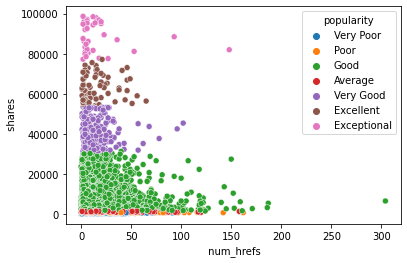

In [26]:
sns.scatterplot(x=' num_hrefs',y=' shares', hue='popularity', data=tmp)

##### Commentaire

La popularité des articles dépend de la quantité de liens contenues. Ceux qui sont populaires en contiennent entre 0 et 50

#### Media data

num_imgs: Number of images

num_videos: Number of videos 

<AxesSubplot:xlabel=' num_imgs', ylabel=' shares'>

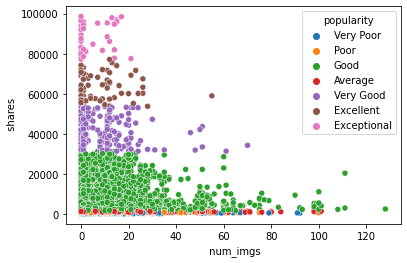

In [27]:
sns.scatterplot(x=' num_imgs',y=' shares', hue='popularity', data=tmp)

##### Commentaire

La popularité des articles dépend de la quantité de d'images. Ceux qui sont populaires en contiennent entre 0 et 40

<AxesSubplot:xlabel=' num_videos', ylabel=' shares'>

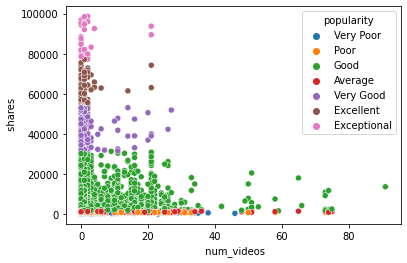

In [28]:
sns.scatterplot(x=' num_videos',y=' shares', hue='popularity', data=tmp)

##### Commentaire

La popularité des articles dépend de la quantité de vidéos. Ceux qui sont populaires en contiennent entre 0 et 25

#### Analyse des données qualitatives

Les articles poster le weekend bénéficient de moins de popularité que ceux poster en semaines. Les plus populaires sont ceux publier en semaine et plus particulièrement de lundi au jeudi.

Concernant les canaux de diffusion ils sont tous assez populaire à part "Lifestyle" et "Social media" qui le sont moins. "Other" est populaire mais ce n'est pas une informations pertinente puisque on n'en connais pas le détail.

#### Analyse des données quantitatives

On a précedement tester différente varilable pour visualiser leur impact sur la popularité des nouvelles.

On remarque que les arrticles les plus populaire contiennent:
- moins de 2000 mots
- entre 6 et 17 caractères dans le titre
- un ratio de fréquence d'utilisation de mots entre 0.3 et 0.8
- des mots d'une longueur moyenne entre 4 et 6 caractères
- entre 4 et 6 mots clés
- entre 0 et 50 liens (lower is better)
- entre 0 et 25 vidéos (lower is better)
- entre 0 et 40 images (lower is better)


## Marchine Learning

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
# on retire les données qualitative pour réaliser la classification
ml_df = df
ml_df.drop(labels=['weekdays', 'data_channel'], axis = 1, inplace=True)
ml_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Very Poor
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Poor
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Good
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Average
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Very Poor


In [31]:
X = ml_df.drop([' shares', 'popularity'],axis=1)
y = ml_df[' shares']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
def converter(x):
    x.astype(str)
    for index, value in x.items():
        if int(value) <= 645:
            x[index] = 'Very Poor'
        elif int(value) > 645 and int(value) <= 861:
            x[index] = 'Poor'
        elif int(value) > 861 and int(value) <= 1400:
            x[index] = 'Average'
        elif int(value) > 1400 and int(value) <= 31300:
            x[index] = 'Good'
        elif int(value) > 31300 and int(value) <= 53700:
            x[index] = 'Very Good'
        elif int(value) > 53700 and int(value) <= 77200:
            x[index] = 'Excellent'
        else:
            x[index] = 'Exceptional'
    return x

class_y_train = y_train
class_y_test = y_test

class_y_train = converter(y_train)
class_y_test = converter(y_test)

### On test différents models

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, class_y_train)

knn_prediction = knn_model.predict(X_test)


knn_acc = accuracy_score(y_test, knn_prediction)
print('Accuracy : ' + str(knn_acc))

Accuracy : 0.4391004809567139


In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()

forest_model.fit(X_train, class_y_train)

forest_prediction = forest_model.predict(X_test)


forest_acc = accuracy_score(y_test, forest_prediction)
print('Accuracy : ' + str(forest_acc))

Accuracy : 0.5221630053295203


In [35]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()

ada_model.fit(X_train, class_y_train)

ada_prediction = ada_model.predict(X_test)


ada_acc = accuracy_score(y_test, ada_prediction)
print('Accuracy : ' + str(ada_acc))

Accuracy : 0.49954504094631486


### Conclusion

Pour cette classification on a essayé d'attribuer le niveau de popularité des nouvelles en fonction des données quantitative du dataset.

Les résultats obtenue avec les différents model testé vont de 43% à 50% de précision ce qui signifie que dans l'on a une chance sur deux de réussire à attribuer le bon label parmis catégories (une chance sur sept si réaliser de manière aléatoire). Cela signifie que les données utilisés dans ce dataset sont corrélés à la popularité des nouvelles et donc sont de bon marqueurs de prédiction.

### Sauvegarde des modèles 

In [38]:
import pickle
pickle.dump(knn_model, open('knn.sav', 'wb'))
pickle.dump(forest_model, open('random_forest.sav', 'wb'))
pickle.dump(ada_model, open('ada.sav', 'wb'))